#   This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import featuretools as ft

import seaborn as sns
import numpy as np


In [41]:
import featuretools as ft
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_red = pd.read_csv('data/winequality-red.csv', delimiter=';')
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
data_red['unique_id'] = range(1, len(data_red) + 1)
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,unique_id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,4
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5


In [3]:
data_white = pd.read_csv('data/winequality-white.csv', delimiter=';')
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [12]:
data_white['unique_id'] = range(1, len(data_white) + 1)
data_white.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,unique_id
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,3
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,4
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,5


In [22]:
data_red.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1599 entries, 1 to 1599
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  unique_id             1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 174.9 KB


In [23]:
data_white.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4898 entries, 1 to 4898
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  unique_id             4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 535.7 KB


In [5]:
data_red["source"] = 0  # Позначаємо червоне вино як 0
data_white["source"] = 1  # Позначаємо біле вино як 1

# Об'єднуємо два датасети
data_combined = pd.concat([data_red, data_white]).reset_index(drop=True)

# Виводимо перші рядки для перевірки
data_combined

# Зберігаємо у файл (якщо потрібно)
# data_combined.to_csv("combined_wine_data.csv", index=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,source
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [28]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  source                6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [6]:
data_combined['unique_id'] = range(1, len(data_combined) + 1)



In [67]:
data_combined.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,source,unique_id
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,2
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,3
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,4
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,5


In [11]:
# Створюємо EntitySet
es = ft.EntitySet(id="wine_dataset")
es = es.add_dataframe(
    dataframe_name="wines",
    dataframe=data_combined,
    # index="unique_id"
)
es

Entityset: wine_dataset
  DataFrames:
    wines [Rows: 6497, Columns: 14]
  Relationships:
    No relationships

In [43]:
# Генеруємо фічі
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="wines",
    trans_primitives=[
       # "divide_numeric",   # Замість "divide"
        "add_numeric",      # Додавання числових колонок
        "multiply_numeric", # Множення числових колонок
        "subtract_numeric",  # Новий примітив: віднімання
        "absolute",          # Новий примітив: абсолютне значення
        "percentile"
            ],# Новий примітив: перцентиль    ]
    max_depth=1
)

In [44]:
feature_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,residual sugar - source,residual sugar - sulphates,residual sugar - total sulfur dioxide,residual sugar - volatile acidity,source - sulphates,source - total sulfur dioxide,source - volatile acidity,sulphates - total sulfur dioxide,sulphates - volatile acidity,total sulfur dioxide - volatile acidity
unique_id,,,,,,,,,,,,,,,,,,,,,
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,...,1.9,1.34,-32.1,1.20,-0.56,-34.0,-0.70,-33.44,-0.14,33.30
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,...,2.6,1.92,-64.4,1.72,-0.68,-67.0,-0.88,-66.32,-0.20,66.12
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,...,2.3,1.65,-51.7,1.54,-0.65,-54.0,-0.76,-53.35,-0.11,53.24
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,...,1.9,1.32,-58.1,1.62,-0.58,-60.0,-0.28,-59.42,0.30,59.72
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,...,1.9,1.34,-32.1,1.20,-0.56,-34.0,-0.70,-33.44,-0.14,33.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,...,0.6,1.10,-90.4,1.39,0.50,-91.0,0.79,-91.50,0.29,91.79
6494,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,...,7.0,7.54,-160.0,7.68,0.54,-167.0,0.68,-167.54,0.14,167.68
6495,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,...,0.2,0.74,-109.8,0.96,0.54,-110.0,0.76,-110.54,0.22,110.76


In [45]:
feature_defs

[<Feature: fixed acidity>,
 <Feature: volatile acidity>,
 <Feature: citric acid>,
 <Feature: residual sugar>,
 <Feature: chlorides>,
 <Feature: free sulfur dioxide>,
 <Feature: total sulfur dioxide>,
 <Feature: density>,
 <Feature: pH>,
 <Feature: sulphates>,
 <Feature: alcohol>,
 <Feature: quality>,
 <Feature: source>,
 <Feature: ABSOLUTE(alcohol)>,
 <Feature: ABSOLUTE(chlorides)>,
 <Feature: ABSOLUTE(citric acid)>,
 <Feature: ABSOLUTE(density)>,
 <Feature: ABSOLUTE(fixed acidity)>,
 <Feature: ABSOLUTE(free sulfur dioxide)>,
 <Feature: ABSOLUTE(pH)>,
 <Feature: ABSOLUTE(quality)>,
 <Feature: ABSOLUTE(residual sugar)>,
 <Feature: ABSOLUTE(source)>,
 <Feature: ABSOLUTE(sulphates)>,
 <Feature: ABSOLUTE(total sulfur dioxide)>,
 <Feature: ABSOLUTE(volatile acidity)>,
 <Feature: alcohol + chlorides>,
 <Feature: alcohol + citric acid>,
 <Feature: alcohol + density>,
 <Feature: alcohol + fixed acidity>,
 <Feature: alcohol + free sulfur dioxide>,
 <Feature: alcohol + pH>,
 <Feature: alcohol + 

In [46]:
quality_features = [col for col in feature_matrix.columns if "quality" in col.lower() and col != "quality"]
feature_matrix_cleaned = feature_matrix.drop(columns=quality_features)

In [47]:
# Аналіз кореляції з quality на очищеному наборі
correlation = feature_matrix_cleaned.corr()['quality'].sort_values(ascending=False)
print("Кореляція з 'quality' (після видалення фіч із 'quality' у назві):")
# print(correlation.head(100)) # Топ-10 фіч із найбільшою кореляцією
# print(correlation.tail(10))# Топ-10 фіч із найменшою кореляцією
correlation

Кореляція з 'quality' (після видалення фіч із 'quality' у назві):


quality                         1.000000
alcohol - volatile acidity      0.474066
alcohol + source                0.453677
alcohol + citric acid           0.451971
alcohol - chlorides             0.446663
                                  ...   
chlorides + volatile acidity   -0.280854
PERCENTILE(chlorides)          -0.286991
density                        -0.305858
ABSOLUTE(density)              -0.305858
PERCENTILE(density)            -0.311374
Name: quality, Length: 235, dtype: float64

In [48]:
# Фільтруємо фічі з кореляцією > 0.2 або < -0.2
selected_features = correlation[abs(correlation) > 0.2].index.tolist()
feature_matrix_filtered = feature_matrix_cleaned[selected_features]
print(f"\nКількість фіч після фільтрації за кореляцією (> 0.2 або < -0.2): {feature_matrix_filtered.shape[1]}")
# print(f"Вибрані фічі: {selected_features}")


Кількість фіч після фільтрації за кореляцією (> 0.2 або < -0.2): 48


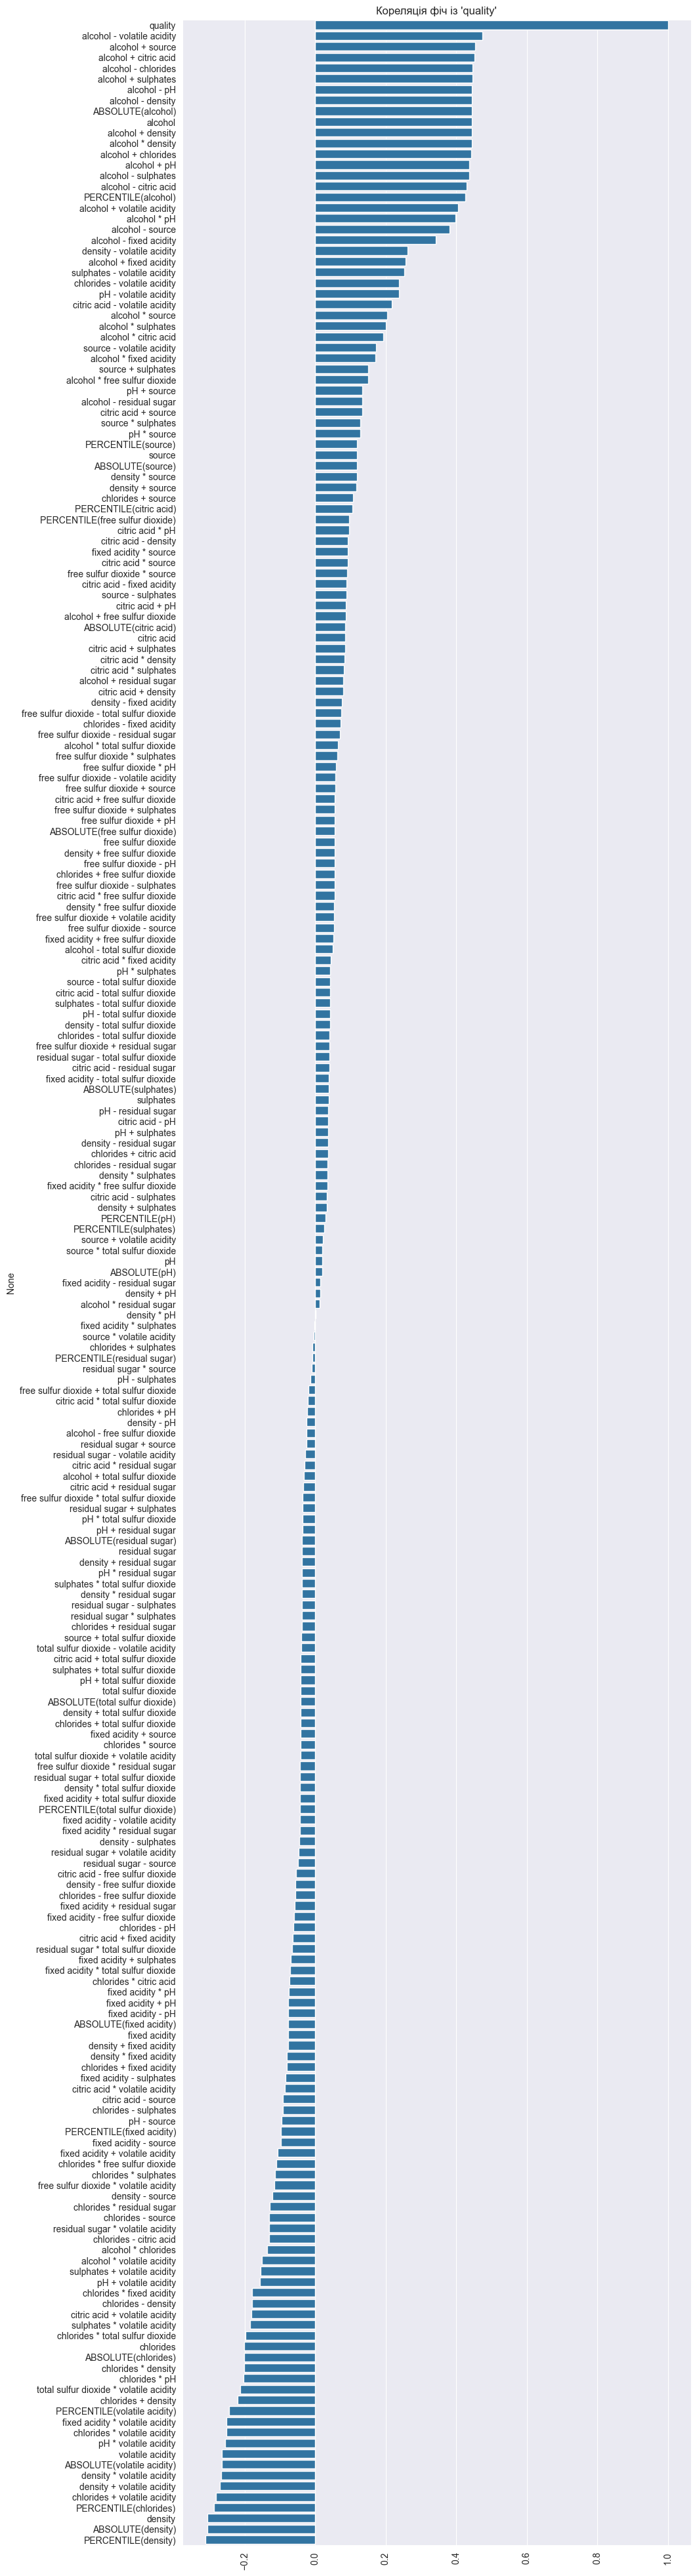

In [49]:
# Візуалізація кореляції
plt.figure(figsize=(10, 50))
sns.barplot(y=correlation.index, x=correlation.values)
plt.xticks(rotation=90)
plt.title("Кореляція фіч із 'quality'")
plt.show()


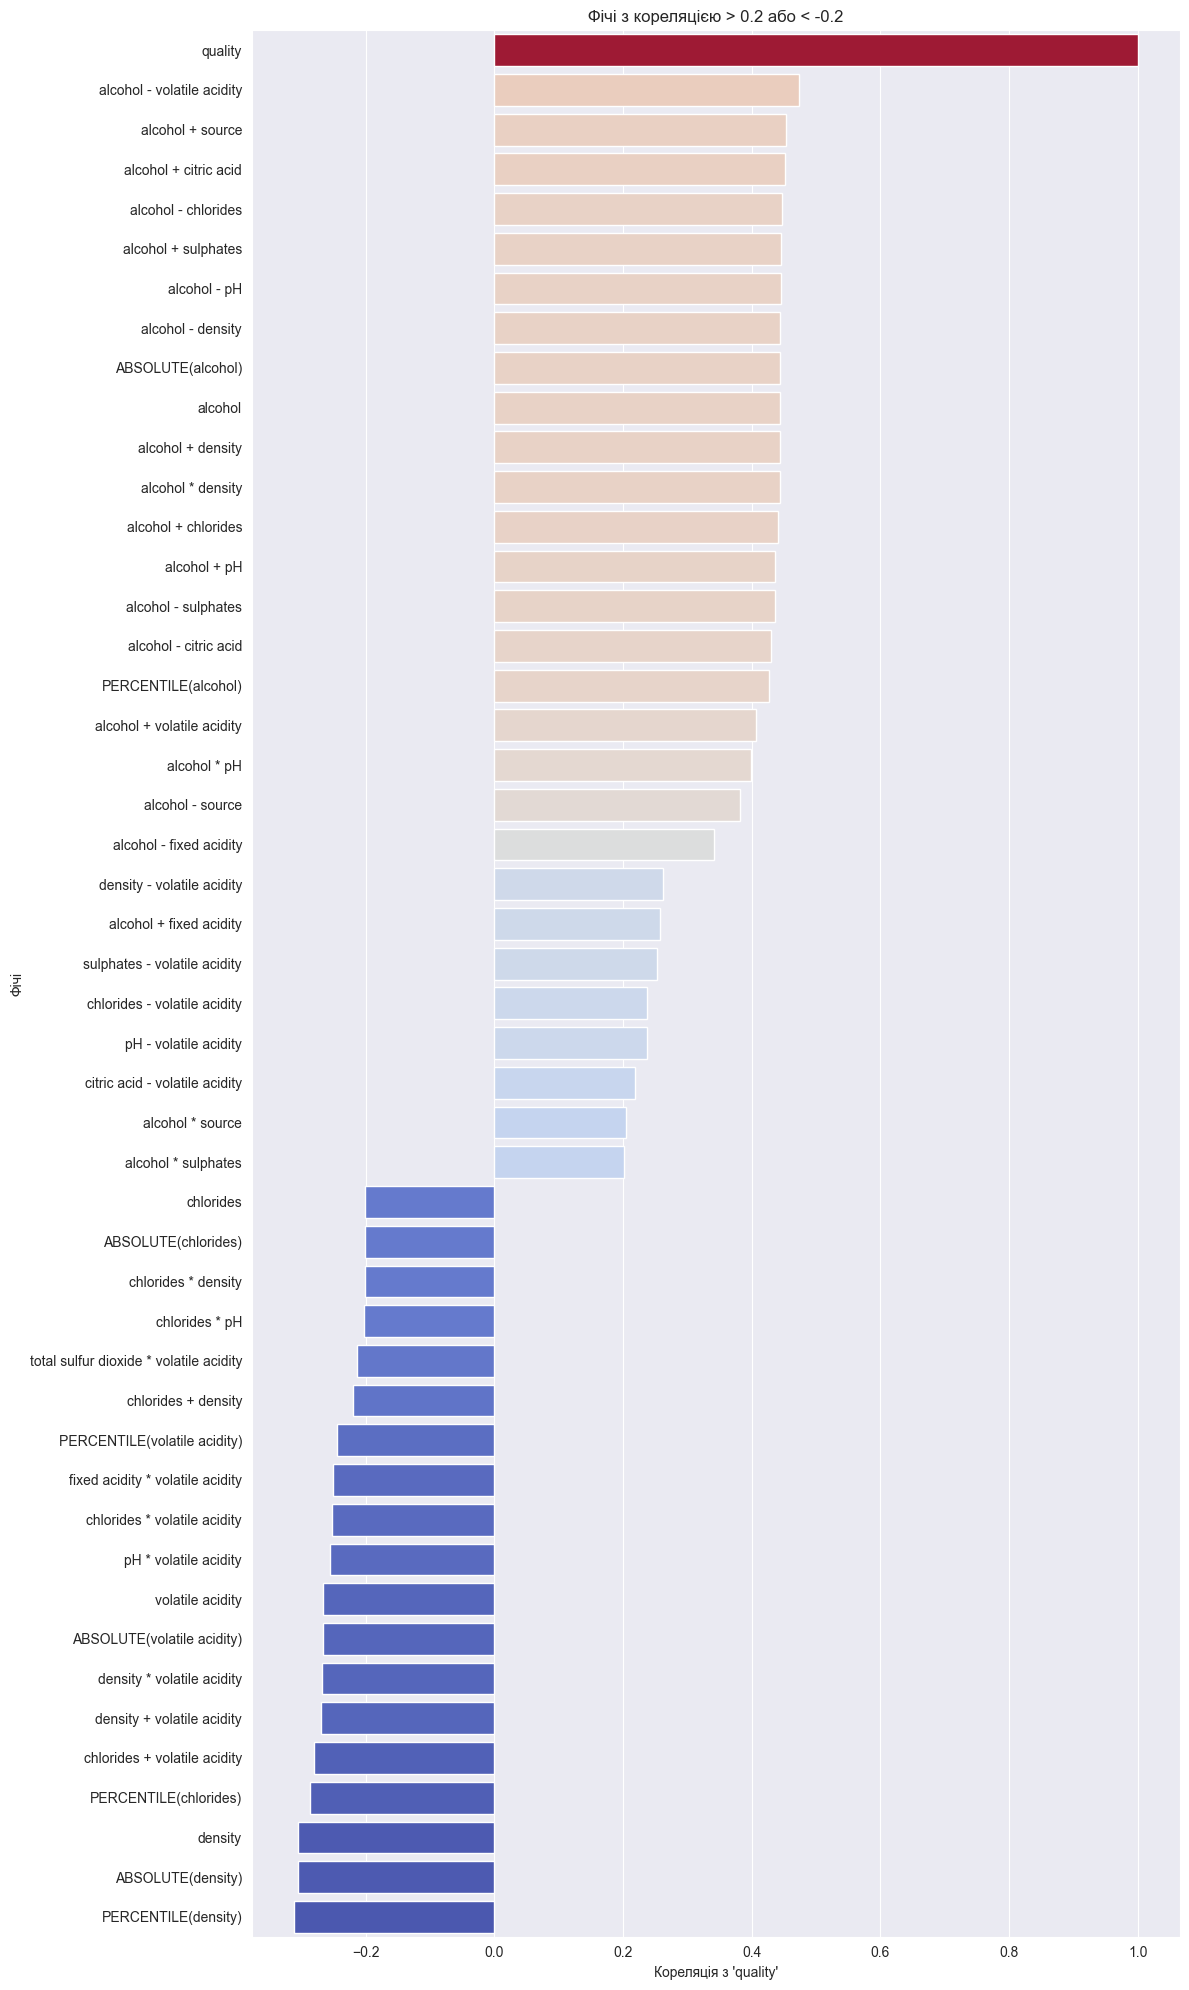

In [50]:
plt.figure(figsize=(12, 20))
sns.barplot(
    x=correlation[abs(correlation) > 0.2].values,
    y=correlation[abs(correlation) > 0.2].index,
    hue=correlation[abs(correlation) > 0.2].values,
    palette="coolwarm",
    legend=False
)
plt.xlabel("Кореляція з 'quality'")
plt.ylabel("Фічі")
plt.title("Фічі з кореляцією > 0.2 або < -0.2")
plt.tight_layout()
plt.show()

In [53]:
# Додатковий відбір фіч за допомогою RFE
X_temp = feature_matrix_filtered.drop(columns=["quality"]).values
y_temp = feature_matrix_filtered["quality"].values
scaler_temp = StandardScaler()
X_temp_scaled = scaler_temp.fit_transform(X_temp)

n_features_available = X_temp.shape[1]  # Кількість доступних фіч
n_features_to_select = min(50, n_features_available // 2)  # Вибираємо половину або 50, якщо менше
print(f"Доступно фіч для RFE: {n_features_available}, вибираємо: {n_features_to_select}")

ridge_temp = Ridge(alpha=1.0)
rfe = RFE(estimator=ridge_temp, n_features_to_select=n_features_to_select)
rfe.fit(X_temp_scaled, y_temp)

Доступно фіч для RFE: 47, вибираємо: 23


RFE(estimator=Ridge(), n_features_to_select=23)

In [54]:
# Отримуємо індекси вибраних фіч
selected_rfe_indices = rfe.support_
selected_rfe_features = feature_matrix_filtered.drop(columns=["quality"]).columns[selected_rfe_indices].tolist()
selected_rfe_features.append("quality")  # Додаємо "quality" назад
feature_matrix_final = feature_matrix_filtered[selected_rfe_features]
print(f"\nКількість фіч після RFE: {feature_matrix_final.shape[1]}")
print(f"Вибрані фічі після RFE: {selected_rfe_features}")


Кількість фіч після RFE: 24
Вибрані фічі після RFE: ['alcohol + source', 'alcohol - pH', 'alcohol * density', 'PERCENTILE(alcohol)', 'alcohol * pH', 'alcohol - source', 'alcohol - fixed acidity', 'alcohol + fixed acidity', 'pH - volatile acidity', 'alcohol * source', 'alcohol * sulphates', 'chlorides', 'ABSOLUTE(chlorides)', 'chlorides * density', 'chlorides * pH', 'chlorides + density', 'PERCENTILE(volatile acidity)', 'fixed acidity * volatile acidity', 'chlorides * volatile acidity', 'pH * volatile acidity', 'density * volatile acidity', 'PERCENTILE(chlorides)', 'density', 'quality']


In [66]:
feature_matrix_final.head()

,alcohol + source,alcohol - pH,alcohol * density,PERCENTILE(alcohol),alcohol * pH,alcohol - source,alcohol - fixed acidity,alcohol + fixed acidity,pH - volatile acidity,alcohol * source,...,chlorides * pH,chlorides + density,PERCENTILE(volatile acidity),fixed acidity * volatile acidity,chlorides * volatile acidity,pH * volatile acidity,density * volatile acidity,PERCENTILE(chlorides),density,quality
unique_id,,,,,,,,,,,,,,,,,,,,,
1,9.4,5.89,9.37932,0.206172,32.994,9.4,2.0,16.8,2.81,0.0,...,0.26676,1.0738,0.962213,5.180,0.05320,2.4570,0.698460,0.825073,0.9978,5
2,9.8,6.60,9.76864,0.359781,31.360,9.8,2.0,17.6,2.32,0.0,...,0.31360,1.0948,0.990149,6.864,0.08624,2.8160,0.877184,0.944282,0.9968,5
3,9.8,6.54,9.77060,0.359781,31.948,9.8,2.0,17.6,2.50,0.0,...,0.29992,1.0890,0.975835,5.928,0.06992,2.4776,0.757720,0.923349,0.9970,5
4,9.8,6.64,9.78040,0.359781,30.968,9.8,-1.4,21.0,2.88,0.0,...,0.23700,1.0730,0.455980,3.136,0.02100,0.8848,0.279440,0.816839,0.9980,6
5,9.4,5.89,9.37932,0.206172,32.994,9.4,2.0,16.8,2.81,0.0,...,0.26676,1.0738,0.962213,5.180,0.05320,2.4570,0.698460,0.825073,0.9978,5


In [68]:
feature_matrix_final = pd.concat([data_combined, feature_matrix_final.loc[:, ~feature_matrix_final.columns.isin(data_combined.columns)]], axis=1)

In [73]:
# Розділяємо дані
X = feature_matrix_final.drop(columns=["quality"]).values
y = feature_matrix_final["quality"].values


In [74]:
# Розділяємо на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
# Масштабування фіч
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
# Підбір гіперпараметра alpha для Ridge через GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

In [77]:
# Найкраща модель
best_model = grid_search.best_estimator_
print("\nНайкраще значення alpha:", grid_search.best_params_['alpha'])
print("Найкращий результат на крос-валідації (MSE):", -grid_search.best_score_)


Найкраще значення alpha: 10.0
Найкращий результат на крос-валідації (MSE): 0.5274236638008998


In [78]:
# Передбачення на тестовій вибірці
y_pred = best_model.predict(X_test_scaled)

In [79]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nСередньоквадратична помилка (MSE) на тестовій вибірці:", mse)
print("Коефіцієнт детермінації (R²) на тестовій вибірці:", r2)



Середньоквадратична помилка (MSE) на тестовій вибірці: 0.5370584418286138
Коефіцієнт детермінації (R²) на тестовій вибірці: 0.2728172657238609


In [80]:
# Округлюємо передбачення
y_pred_rounded = np.round(y_pred)
print("\nРеальні значення:", y_test)
print("Передбачені значення (округлені):", y_pred_rounded)


Реальні значення: [8 5 7 ... 7 6 7]
Передбачені значення (округлені): [7. 5. 6. ... 7. 5. 6.]


In [81]:
# Коефіцієнти моделі
feature_importance = pd.Series(best_model.coef_, index=feature_matrix_final.drop(columns=["quality"]).columns).sort_values(ascending=False)
print("\nКоефіцієнти фіч (вагомість):")
print(feature_importance.head(10))



Коефіцієнти фіч (вагомість):
alcohol * pH                        0.378926
residual sugar                      0.295352
fixed acidity * volatile acidity    0.249337
alcohol * source                    0.187470
alcohol * sulphates                 0.161828
free sulfur dioxide                 0.097904
alcohol - source                    0.088354
alcohol - pH                        0.023827
ABSOLUTE(chlorides)                 0.021098
chlorides                           0.021098
dtype: float64


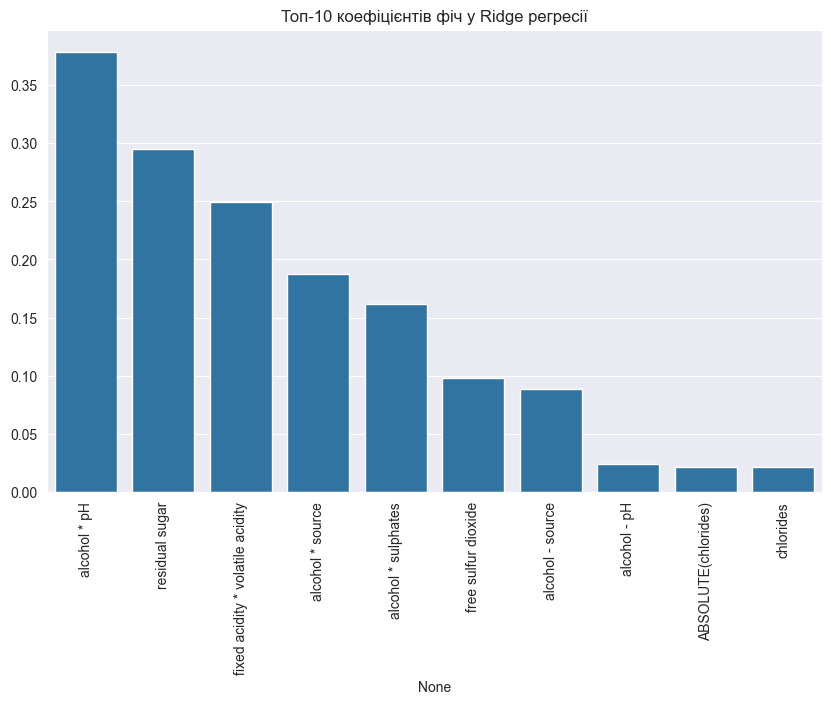

In [82]:
# Візуалізація коефіцієнтів
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.index[:10], y=feature_importance.values[:10])
plt.xticks(rotation=90)
plt.title("Топ-10 коефіцієнтів фіч у Ridge регресії")
plt.show()

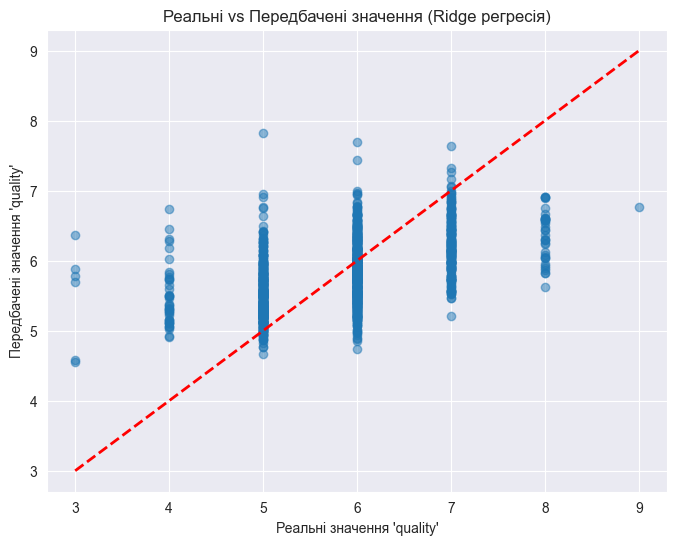

In [65]:
# Графік реальних vs передбачених значень
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Реальні значення 'quality'")
plt.ylabel("Передбачені значення 'quality'")
plt.title("Реальні vs Передбачені значення (Ridge регресія)")
plt.show()